Classify the numbers (0-9) using KNN




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

step 1: Input the pattern in the form of 1-D array.

	*	*	
*			*
*			*
 *		*
	*	*	
Input pattern 0, Corresponding input array ={ 0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0}



In [ ]:
def InputPattern(train_or_test):

  if train_or_test == 'train' : 

    data = np.array([
                          [2.5,0],
                          [1.5,1],
                          [1,2],
                          [1,3],
                          [1.5,4],
                          [2.5,5],
                          [3.5,4],
                          [4,3],
                          [4,2],
                          [3.5,1],
                      ])
    labels = ['0','1','2','3','4','5','6','7','8','9']
  else : 

    data = np.array([
                        [1.25,2],
                        [2,4.45],
                        [3,2]
                      ])
  
    labels = ['2','4','9']

  return data,labels

  # write your code here

train_x,labels_train = InputPattern('train')
test_x,labels_test = InputPattern('test')

print("X Train Shape = ",train_x.shape," Labels Shape = " ,len(labels_train))
print("X Test Shape = ",test_x.shape," Labels Shape =", len(labels_test))

X Train Shape =  (10, 2)  Labels Shape =  10
X Test Shape =  (3, 2)  Labels Shape = 3


Step2 :Plot the input patterns and write the classify code using *KNN*

[(array([4., 2.]), '8', 1.0), (array([3.5, 1. ]), '9', 1.118033988749895), (array([4., 3.]), '7', 1.4142135623730951)]
The predicted label of ( 3.0 , 2.0 )  =   8 , True Label =  9


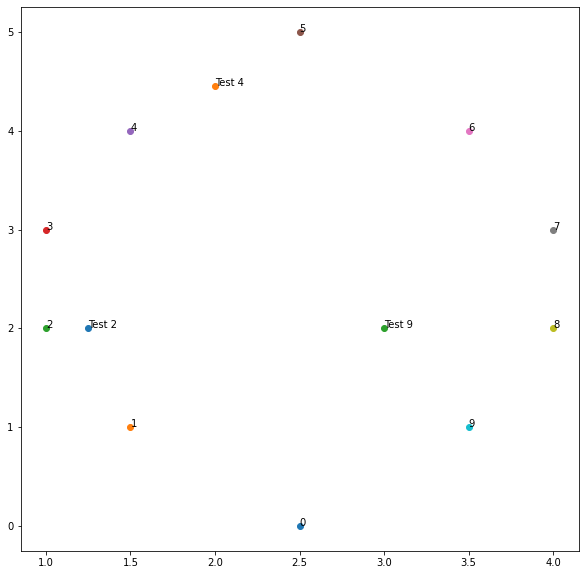

In [ ]:
# write your code here

def scatter_plot(train_x, labels,test_x,labels_test):
    
    assert len(labels) == train_x.shape[0] 
      
    train_x_class = dict()


    i = 0
    for label in labels :
      if label not in train_x_class :
        train_x_class[label] = [] 
      train_x_class[label].append(train_x[i])
      i = i+1


    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    markers = ['o','x']
    i = 0 
    for label in train_x_class :
      data = np.array(train_x_class[label])

      ax.scatter(data[:,0],data[:,1])
      ax.annotate(label,(data[:,0],data[:,1]))
      i = i + 1

    i = 0 
    for label in labels_test : 
      ax.scatter(test_x[i,0],test_x[i,1])
      ax.annotate("Test "+label,(test_x[i,0],test_x[i,1]))
      i = i+1



def k_nearest_neighbors(train_x,labels_train,test_x_row,k):
    
    distances = list()
    for i in range(train_x.shape[0]):
        distance = np.linalg.norm(train_x[i]-test_x_row)
        distances.append((train_x[i],labels_train[i],distance))
    distances.sort(key = lambda x : x[2])
    return distances[0:k]

def KNNClassify(train_x,labels_train,test_x_row,k):
    
    neighbors = k_nearest_neighbors(train_x,labels_train,test_x_row,k)
    print(neighbors)

    # Get the labels of the nearest neighbors
    classes = []
    for neigh in neighbors:
      classes.append(neigh[1])
    

    # If the vote count is equal then, return the closest label
    classes_set = set(classes)
    if len(classes_set) == len(classes) :
      return classes[0]
    # If the vote count is unequal then, return the label with max vote
    else :
      prediction = max(set(classes),key = classes.count)
    
    return prediction

scatter_plot(train_x,labels_train,test_x,labels_test)


test_idx = 2
label_random = KNNClassify(train_x,labels_train,test_x[test_idx],3)
print("The predicted label of (", test_x[test_idx][0], "," , test_x[test_idx][1], ")  =  ",label_random, ", True Label = ",labels_test[test_idx])


step3 : Test with noisy inputs and plot the noisy input and the classified output pattern

In [ ]:
#testing
def test_fn(train,test,k):
    
    accuracy = 0 
    for i in range(test['x'].shape[0]):
        
        prediction = KNNClassify(train['x'],train['y'],test['x'][i],k)
        if prediction == test['y'][i]:
            accuracy += 1
    
    accuracy = (accuracy*100)/(test['x'].shape[0])
    return accuracy

train = {
    'x' : train_x,
    'y' : labels_train
}
test = {
    'x' : test_x,
    'y' : labels_test
}

acc = test_fn(train,test,3)
print("The accuracy of the Classifier is  = ",acc)

[(array([1., 2.]), '2', 0.25), (array([1.5, 1. ]), '1', 1.0307764064044151), (array([1., 3.]), '3', 1.0307764064044151)]
[(array([1.5, 4. ]), '4', 0.6726812023536856), (array([2.5, 5. ]), '5', 0.7433034373659251), (array([3.5, 4. ]), '6', 1.5660459763365826)]
[(array([4., 2.]), '8', 1.0), (array([3.5, 1. ]), '9', 1.118033988749895), (array([4., 3.]), '7', 1.4142135623730951)]
The accuracy of the Classifier is  =  66.66666666666667
